In [1]:
from __future__ import division
import numpy as np
import pylab as plt
import scipy.optimize as op
from scipy.integrate import odeint
from scipy.integrate import nquad
%matplotlib inline

In [2]:
#length in cm, Density in GeV/cm^3

#Milky Way
"""
r_s = 20 * 3.08567758e19 # cm
rho_0 = 0.4 # GeV/cm^3
a = 0.2

def DM_density_NFW(rho_0, r_s, r):
    print(rho_0 / ((r / r_s) * (1 + (r / r_s))**2 ))
    
def DM_density_BURK(rho_0, r_s, r):
    print(rho_0 / ((1 + r / r_s) * (1 + (r / r_s )**2)))
    
def DM_denisty_EIN(rho_0, r_s, a, r):
    print(rho_0 * exp(-(2 / a) * ((r/r_s)**a - 1)))
"""

'\nr_s = 20 * 3.08567758e19 # cm\nrho_0 = 0.4 # GeV/cm^3\na = 0.2\n\ndef DM_density_NFW(rho_0, r_s, r):\n    print(rho_0 / ((r / r_s) * (1 + (r / r_s))**2 ))\n    \ndef DM_density_BURK(rho_0, r_s, r):\n    print(rho_0 / ((1 + r / r_s) * (1 + (r / r_s )**2)))\n    \ndef DM_denisty_EIN(rho_0, r_s, a, r):\n    print(rho_0 * exp(-(2 / a) * ((r/r_s)**a - 1)))\n'

In [3]:
def DM_density_NFW(r, rho_0, r_s, square=False):
    rho = rho_0 / ((r / r_s) * (1 + (r / r_s))**2 )
    if (square!=True):
        return rho
    else:
        return rho**2
    
def DM_density_BURK(r, rho_0, r_s, square=False):
    rho =  rho_0 / ((1 + r / r_s) * (1 + (r / r_s )**2))
    if (square!=True):
        return rho
    else:
        return rho**2
    
def DM_density_EIN(r, rho_0, r_s, a, square=False):
    rho = rho_0 * np.exp(-(2 / a) * ((r/r_s)**a - 1))
    if (square!=True):
        return rho
    else:
        return rho**2

def DM_density_GNFW(r, rho_0, r_s, gamma, square=False):
    rho = rho_0/((r/r_s)**gamma*(1+(r/r_s))**(3-gamma))
    if (square!=True):
        return rho
    else:
        return rho**2
    
    
# General DM density function
def DM_density(TYPE, r, rho_0, r_s, gamma=1, a=1, square=False):
    if ((TYPE=="NFW") or (TYPE=="nfw")):
        return DM_density_NFW(r, rho_0, r_s, square)
    elif ((TYPE=="Burk") or (TYPE=="Burkert") or (TYPE=="BURK")):
        return DM_density_BURK(r, rho_0, r_s, square)
    elif ((TYPE=="Ein") or (TYPE=="EIN") or (TYPE=="Einasto")):
        return DM_density_EIN(r, rho_0, r_s, a, square)
    elif ((TYPE=="GNFW") or (TYPE=="gnfw")):
        return DM_density_GNFW(r, rho_0, r_s, gamma, square)   
    else:
        print("Error: \tdensity profile TYPE was not recognized. Returned -1.")
        print("\tPlease specify either of the following profile TYPEs:")
        print("\t\t-\"NFW\" for Navarro-Frenk-White profile")
        print("\t\t-\"Burk\" for Burkert profile")
        print("\t\t-\"Ein\" for Einasto profile")
        print("\t\t-\"GNFW\" for generalized Navarro-Frenk-White profile")
        return -1
        
# Allows for computation of the dark matter density along the line of 
# sight. Parameters:
#     - l: the line of sight distance into the dark matter halo
#     - mu: the cosine of the viewing angle w.r.t. the galactic center
def DM_density_LOS(l, mu, d=8.5*kpc_to_cm, rho_0=0.471, r_s = 16*kpc_to_cm,
                   gamma=1, a=1, square=True, Type="NFW"):
    r = np.sqrt(l**2 + d**2 - 2*l*d*mu)
    return DM_density(Type, r, rho_0, r_s, gamma, a, square)      

In [4]:
# Distance in cm
# Density in GeV/cm^3
# kpc in cm 3,086e+21
kpc_to_cm=3.086e+21

# Milky Way parameters
rho_0 = 0.471 # GeV/cm^3
r_s = 16*kpc_to_cm # cm
d = 8.5 * kpc_to_cm # cm

# Spheroidal dwarf galaxies data
Dsphd_data = np.loadtxt("data_dwarf_galaxies.txt", usecols=(1,3,5,6,7,8))

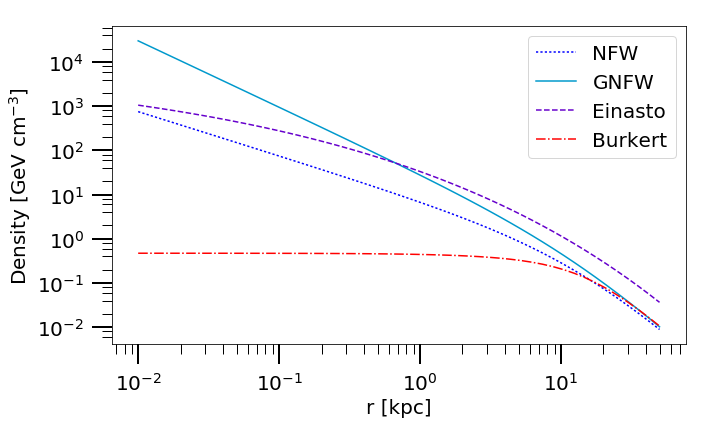

In [5]:


#  A range of input radii and plot parameters
r=np.logspace(np.log10(0.01*kpc_to_cm), np.log10(50*kpc_to_cm), 50)
a_lst = [1,1,0.2,1]
gamma_lst = [1, 1.5, 1, 1]
typelst = ["NFW", "GNFW", "Einasto", "Burkert"]
colorlst = ["b","#0099cc", "#6600cc", 'r']
linestylelst = [":", "-", "--", "-."]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
for i in range(4):
    density = DM_density(typelst[i], r, rho_0, r_s, gamma_lst[i], a_lst[i])
    ax.plot(r/kpc_to_cm, density, color=colorlst[i], 
            linestyle=linestylelst[i], label=typelst[i])
ax.set_xlabel(r"r [kpc]", fontsize=20)
ax.set_ylabel(r"Density [GeV $\mathrm{cm}^{-3}}$]", fontsize=20)
ax.set_xscale("log")
ax.set_yscale("log")
#ax.set_title("Compton scattered spectrum $E_{photon,in}=$"+str(e_in))
ax.tick_params('both', labelsize=20, length=20, width=2, which='major', pad=8)
ax.tick_params('both', labelsize=20, length=10, width=1, which='minor',pad=8)
plt.legend(fontsize=20)
plt.tight_layout()
plt.show()

In [29]:
print(Dsphd_data[i-1,1])

250.0


In [ ]:
#objects=["Milky Way", "Carina", "Draco", "LeoII"]

def plot_dwarf_galaxies(d_factor, objects, profile_type, max_angle):
    # Plot parameters
    #obj_names = ["Milky Way", "Carina", "Draco", "LeoII"]
    colorlst = ["b","#0099cc", "#6600cc", 'r']

    # Initialize plot 
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    nr_of_evals=20
    # Compute the J-factors
    angle = np.linspace(0.1,max_angle,nr_of_evals) # deg
    D_factors, J_factors = np.zeros([2,5,nr_of_evals])

    for obj in objects:
        print(obj)
        if obj=="Milky Way":
            # Milky Way parameters
            rho_0 = 0.471 # GeV/cm^3
            r_s = 16*kpc_to_cm # cm
            d = 8.5 * kpc_to_cm # cm

        else:
            # Spheroidal dwarf galaxy parameters
            #rho_0 = 0.471 #TODO Do we know all densities at the galactic center?
            r_s = 5*Dsphd_data[i-1,1] * 1e-3 * kpc_to_cm
            rho_0=4.5e-2*(5*Dsphd_data[i-1,1] * 1e-3)**(-2/3)*36.97
            d = Dsphd_data[i-1,0] * 1e-3 * kpc_to_cm

            # Plot datapoint TODO!!!!!!!!!!!!
            #print(Dsphd_data[i-1,2], Dsphd_data[i-1,3], [-Dsphd_data[i-1,4],Dsphd_data[i-1,5]])
            #ax.errorbar(Dsphd_data[i-1,2], Dsphd_data[i-1,3], yerr=[-Dsphd_data[i-1,4],Dsphd_data[i-1,5]], fmt='ko')    
        for j, theta in enumerate(angle):
            theta *= (np.pi / 180) # Conversion to rad
            if d_factor==True:
                D = nquad(DM_density_LOS, [[0,2*d],[np.cos(theta),1]],
                                args=(d, rho_0, r_s, 1, 1, False, profile_type))
                D_factors[i,j] = 2*np.pi * D[0]
            J = nquad(DM_density_LOS, [[0,2*d],[np.cos(theta),1]],
                            args=(d, rho_0, r_s, 1, 1, True, profile_type))
            J_factors[i,j] = 2*np.pi * J[0]
        if obj=="Carina":
            carina_angle=[1.26, 0.15, 0.5]
            carina_j=[10**17.92, 10**17.87, 10**18.1]
            carina_j_error=[10**0.19, 10**0.1, 10**0.23]
            ax.errorbar(carina_angle, carina_j, yerr=carina_j_error, c="k", label="Carina data")
        if obj=="Draco":
            draco_angle=[1.30, 0.40, 0.5]
            draco_j=[10**19.05, 10**18.84, 10**18.8]
            draco_j_error=[10**0.22, 10**0.12, 10**0.16]
            ax.errorbar(draco_angle, draco_j, yerr=draco_j_error, c="g", label="Draco data")
        if obj=="LeoII":
            leoII_angle=[0.23, 0.04, 0.5]
            leoII_j=[10**17.97, 10**17.97, 10**17.6]
            leoII_j_error=[10**0.2,10**0.2, 10**0.18]
            ax.errorbar(leoII_angle, leoII_j, yerr=leoII_j_error, c="r", label="Leo II data")
        if d_factor==True:
            ax.plot(angle, D_factors[i], color=colorlst[i], linestyle="--", label="D-factor"+ obj)

        ax.plot(angle, J_factors[i], color=colorlst[i], linestyle='-', label="J-factor"+ obj)

    ax.set_xlabel("Angle [deg]", fontsize=20)
    ax.set_ylabel(r"J-Factor [$\mathrm{GeV}^2 \mathrm{cm}^{-5}$]", fontsize=20)
    ax.set_yscale("log")
    ax.set_xlim([0,max_angle])
    #ax.set_title("Compton scattered spectrum $E_{photon,in}=$"+str(e_in))
    ax.tick_params('both', labelsize=20, length=20, width=2, which='major', pad=8)
    ax.tick_params('both', labelsize=20, length=10, width=1, which='minor',pad=8)
    plt.legend(fontsize=20)
    plt.tight_layout()
    plt.show()

                        
plot_dwarf_galaxies(d_factor=False, objects=["LeoII"], profile_type="NFW", max_angle=1)

LeoII


C:\Users\Iris\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Iris\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
C:\Users\Iris\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error i